# Task 1: Graph Analysis (done by Matthias Vassallo Pulis)

Link to dataset: https://drive.google.com/file/d/1a8ONW4DgnHZir8G19AiYHi4Ufpwi5Ocn/view?usp=sharing

## Importing packages needed for this task

In [1]:
import warnings
warnings.filterwarnings('ignore')

import os
import json
import random
import networkx as nx
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
print('NetworkX version: {}'.format(nx.__version__))

NetworkX version: 2.7.1


### Installing nxneo4j

In [2]:
pip install git+https://github.com/ybaktir/networkx-neo4j

  Cloning https://github.com/ybaktir/networkx-neo4j to c:\users\mvass\appdata\local\temp\pip-req-build-vsv__kp7

  Resolved https://github.com/ybaktir/networkx-neo4j to commit 97dc9563bf992ea9714cbdb99cb9e6a41c7cce65

  Running command git clone -q https://github.com/ybaktir/networkx-neo4j 'C:\Users\mvass\AppData\Local\Temp\pip-req-build-vsv__kp7'


In [3]:
pip install networkx-neo4j

Note: you may need to restart the kernel to use updated packages.


In [4]:
from neo4j import GraphDatabase, basic_auth

### Creating an instance to connect the notebook to the Neo4j DBMS with the below Bolt URL, username and password.

In [5]:
graphDriver = GraphDatabase.driver("bolt://localhost:7687", auth=("neo4j","PassNetWI1357!"))

### Making sure that anything that already exists in the DBMS is deleted to ensure a blank sandbox.

In [6]:
with graphDriver.session() as session:
    session.run("MATCH (n) DETACH DELETE n;")

graphDriver.close()

## Part 1: Creating the passing network

### Part 1.1: Getting the relevant matches.

#### Parsing the competition files and getting a list of all the competitions that are found.

In [7]:
# Setting the file path for all competitions
competitions_file_path = "open-data-master/data/competitions.json"

# Creating a new dictionary to store all the existing competitions found in the file
competition_dict = dict()

# Load the data and put it in a new variable called competitions
with open(competitions_file_path, encoding='utf8') as f:
    competitions = json.load(f)

# Loop through list of competitions and add every unique competition to the dictionary
for competition in competitions:
    comp_id = competition['competition_id']
    comp_name = competition['competition_name']
    if bool(competition_dict) == False or comp_id not in competition_dict:
        competition_dict[comp_id] = comp_name

# Print the dictionary
competition_dict

{16: 'Champions League',
 37: "FA Women's Super League",
 43: 'FIFA World Cup',
 1238: 'Indian Super league',
 11: 'La Liga',
 49: 'NWSL',
 2: 'Premier League',
 55: 'UEFA Euro',
 53: "UEFA Women's Euro",
 72: "Women's World Cup"}

#### Choosing a random competition and getting the list of filenames for the matches found for the competition chosen.

In [8]:
# Choose a random competition id from the dictionary
comp_ids = list(competition_dict.keys())
comp_id_chosen = random.choice(comp_ids)

# For the chosen id, get the list of matches
matches_path = "open-data-master/data/matches/"+str(comp_id_chosen)

# Getting the matches found under the path set above
matches = [m for m in os.listdir(matches_path)]

# Printing the filenames of the matches (for testing)
matches

['44.json']

#### Extracting the data for the matches found from the list of filenames containing those matches.

In [9]:
# Method which extracts the match set as a parameter
def extract_match(match_path):
    with open(match_path, encoding='utf8') as f:
        match = json.load(f)
    
    return match

In [10]:
# Creating a list which stores the match data for all matches found.
matches_list = []

# Looping through the list of matches (filenames)
for match in matches:
    # Setting the file path to be equal to the directory containing the file being looked at.
    match_file_path = matches_path+'/'+str(match)
    
    # Extracting the match data using the above method and setting it to a variable called match_data
    match_data = extract_match(match_file_path)
    
    # Adding the new match data to the list
    matches_list.append(match_data)
        
# Printing a particular match data (for testing purposes)
matches_list[0]

[{'match_id': 3749052,
  'match_date': '2004-02-07',
  'kick_off': '16:00:00.000',
  'competition': {'competition_id': 2,
   'country_name': 'England',
   'competition_name': 'Premier League'},
  'season': {'season_id': 44, 'season_name': '2003/2004'},
  'home_team': {'home_team_id': 46,
   'home_team_name': 'Wolverhampton Wanderers',
   'home_team_gender': 'male',
   'home_team_group': None,
   'country': {'id': 68, 'name': 'England'},
   'managers': [{'id': 3602,
     'name': 'Dave Jones',
     'nickname': None,
     'dob': '1956-08-17',
     'country': {'id': 68, 'name': 'England'}}]},
  'away_team': {'away_team_id': 1,
   'away_team_name': 'Arsenal',
   'away_team_gender': 'male',
   'away_team_group': None,
   'country': {'id': 68, 'name': 'England'},
   'managers': [{'id': 577,
     'name': 'Arsène Wenger',
     'nickname': None,
     'dob': '1949-10-22',
     'country': {'id': 78, 'name': 'France'}}]},
  'home_score': 1,
  'away_score': 3,
  'match_status': 'available',
  'match

#### Getting a list of the match ids and the seasons.

In [11]:
# Creating a list which stores the list of match ids for the matches found
match_ids_list = []

# Creating a dictionary which stores the season id and name for any seasons found in the data
seasons_dict = dict()

# Looping through the list of matches
for match in matches_list: 
    # Using a for loop to gain access to required values
    for i in range(len(match)):
        #print(match[0])
        match_id = match[i]['match_id']
        season_id = match[i]['season']['season_id']
        season_name = match[i]['season']['season_name']
        
        if match_id not in match_ids_list:  # Adding all unique match ids to the list
            match_ids_list.append(match_id)
        if season_id not in seasons_dict:  # Adding all unique seasons to the dictionary
            seasons_dict[season_id] = season_name

# Printing the information retrieved
print("Matches Retrieved:")
print(match_ids_list)
print()
print("Seasons Retrieved:")
print(seasons_dict)

Matches Retrieved:
[3749052, 3749522, 3749246, 3749257, 3749642, 3749358, 3749346, 3749253, 3749079, 3749465, 3749133, 3749528, 3749233, 3749462, 3749552, 3749296, 3749454, 3749276, 3749068, 3749310, 3749493, 3749434, 3749192, 3749196, 3749448, 3749360, 3749453, 3749278, 3749603, 3749153, 3749403, 3749526, 3749431]

Seasons Retrieved:
{44: '2003/2004'}


#### Choosing a season at random from the seasons dictionary, which simplifies the choice of the match to be analysed.

In [12]:
# Creating a tuple which is used to store the season chosen
season = ()

# Checking if the length of the dictionary is equal to 1
if len(seasons_dict) == 1:  # if yes, choose the first element in the dictionary
    season = season_id, season_name = list(seasons_dict.items())[0]
else:  # if no, pick a season at random
    season = season_id, season_name = random.choice(list(seasons_dict.items()))

# Setting the values for the season chosen
season_id_chosen = season_id
season_name_chosen = season_name
print(season_id_chosen)
print(season_name_chosen)

44
2003/2004


#### Retrieving a list of match ids for all those matches which fall under the competition and season chosen.

In [13]:
# Emptying the previous version of match_ids_list in order to store the match ids for the season chosen
match_ids_list = []

# Looping through the list of matches and choosing the matches which fall under the season chosen
for match in matches_list:
    # Using a for loop to gain access to required values
    for i in range(len(match)):
        match_season_id = match[i]['season']['season_id']
        if match_season_id == season_id_chosen:
            match_id = match[i]['match_id']
            
            # Adding all unique match ids to list
            if match_id not in match_ids_list:
                match_ids_list.append(match_id)

print("Match IDs Retrieved for Season: "+str(season_name_chosen))
print(match_ids_list)

Match IDs Retrieved for Season: 2003/2004
[3749052, 3749522, 3749246, 3749257, 3749642, 3749358, 3749346, 3749253, 3749079, 3749465, 3749133, 3749528, 3749233, 3749462, 3749552, 3749296, 3749454, 3749276, 3749068, 3749310, 3749493, 3749434, 3749192, 3749196, 3749448, 3749360, 3749453, 3749278, 3749603, 3749153, 3749403, 3749526, 3749431]


### Part 1.2: Generating the passing network

#### Getting list of events

In [14]:
# Get the paths for the match events
events_path = "open-data-master/data/events"

# Getting the event files found under the path set above
events = [e for e in os.listdir(events_path)]

# Printing the filenames of the events (for testing)
events

['15946.json',
 '15956.json',
 '15973.json',
 '15978.json',
 '15986.json',
 '15998.json',
 '16010.json',
 '16023.json',
 '16029.json',
 '16056.json',
 '16073.json',
 '16079.json',
 '16086.json',
 '16095.json',
 '16109.json',
 '16120.json',
 '16131.json',
 '16136.json',
 '16149.json',
 '16157.json',
 '16173.json',
 '16182.json',
 '16190.json',
 '16196.json',
 '16205.json',
 '16215.json',
 '16231.json',
 '16240.json',
 '16248.json',
 '16265.json',
 '16275.json',
 '16289.json',
 '16306.json',
 '16317.json',
 '18235.json',
 '18236.json',
 '18237.json',
 '18240.json',
 '18241.json',
 '18242.json',
 '18243.json',
 '18244.json',
 '18245.json',
 '19714.json',
 '19715.json',
 '19716.json',
 '19717.json',
 '19718.json',
 '19719.json',
 '19720.json',
 '19722.json',
 '19723.json',
 '19724.json',
 '19725.json',
 '19726.json',
 '19727.json',
 '19728.json',
 '19729.json',
 '19730.json',
 '19731.json',
 '19732.json',
 '19733.json',
 '19734.json',
 '19735.json',
 '19736.json',
 '19737.json',
 '19738.js

#### Choosing a match at random from the list of match ids and extracting the event data for that match. The match chosen will be the one analysed.

In [15]:
# Method which extracts the events for a particular match
def extract_match_events(event_path):
    with open(event_path, encoding='utf8') as f:
        event = json.load(f)
    
    return event

In [16]:
#events_list = []
# Declaring list of variables to be used
event_file_path = ""
event_data = ""
match_id_chosen = 0

# Checking if length of list of match ids found is equal to 1
if len(match_ids_list) == 1:  # if yes, choose the first element in the list
    event_file_path = events_path+'/'+str(match_ids_list[0])+".json"
else:  # if no, choose a match id at random
    match_id_chosen = random.choice(match_ids_list)
    print("Match ID Chosen: "+str(match_id_chosen))
    event_file_path = events_path+'/'+str(match_id_chosen)+".json"

# Checking if the event file path for the match id exists in order to avoid errors
# If it exists, then extract the event data and put it in a variable called event_data
if os.path.isfile(event_file_path):
    event_data = extract_match_events(event_file_path)
        
# Printing a particular event data (for testing purposes)
#print(event_data)

Match ID Chosen: 3749068


#### Extracting the lineup for each team from the match chosen.

In [17]:
# Creating a list which stores the lineup data for the match chosen
lineups_list = []

# Looping through the event data to gain access to required values
for i in range(len(event_data)):
    # Adding starting lineup to list
    if event_data[i]['type']['name'] == 'Starting XI':
        lineup_retrieved = event_data[i]['tactics']['lineup']
        lineups_list.append(lineup_retrieved)

# Assign values for home team lineup and away team lineup
home_lineup = lineups_list[0]
away_lineup = lineups_list[1]

# Printing all retrieved information
print("Home Team Lineup: ")
for i in range(len(home_lineup)):
    print("Player Name: "+str(home_lineup[i]['player']['name']))
    print("Player Position: "+str(home_lineup[i]['position']['name']))
    print("Player Jersey Name: "+str(home_lineup[i]['jersey_number'])+"\n")

print("\nAway Team Lineup: ")
for i in range(len(away_lineup)):
    print("Player Name: "+str(away_lineup[i]['player']['name']))
    print("Player Position: "+str(away_lineup[i]['position']['name']))
    print("Player Jersey Name: "+str(away_lineup[i]['jersey_number'])+"\n")

Home Team Lineup: 
Player Name: Kasey Keller
Player Position: Goalkeeper
Player Jersey Name: 0

Player Name: Stephen Kelly
Player Position: Right Back
Player Jersey Name: 0

Player Name: Ledley King
Player Position: Right Center Back
Player Jersey Name: 0

Player Name: Anthony Gardner
Player Position: Left Center Back
Player Jersey Name: 0

Player Name: Mauricio Taricco
Player Position: Left Back
Player Jersey Name: 0

Player Name: Simon Davies
Player Position: Right Midfield
Player Jersey Name: 0

Player Name: Jamie Redknapp
Player Position: Right Center Midfield
Player Jersey Name: 0

Player Name: Michael Brown
Player Position: Left Center Midfield
Player Jersey Name: 0

Player Name: Johnnie Jackson
Player Position: Left Midfield
Player Jersey Name: 0

Player Name: Frédéric Oumar Kanouté
Player Position: Right Center Forward
Player Jersey Name: 0

Player Name: Robbie Keane
Player Position: Left Center Forward
Player Jersey Name: 0


Away Team Lineup: 
Player Name: Jens Lehmann
Player

#### Filtering the data and extracting the information regarding passes, including name of passer, name of recipient, and number of passes made from passer to recipient.

In [18]:
# Creating a list to store passing data
passes_list = []

In [19]:
# Looping through the event data to gain access to required values
for i in range(len(event_data)):
    # Checking if event type is 'Pass'
    if event_data[i]['type']['name'] == 'Pass':
        # Creating a dict to store information regarding passer and recipient
        pass_from_to_dict = dict()
        passer = event_data[i]['player']['name']
        #print("Pass from Player: "+str(passer))
        
        # Checking if pass was complete
        if 'outcome' not in event_data[i]['pass'].keys():  # if yes, add element to dictionary
            recipient = event_data[i]['pass']['recipient']['name']
            #print("Received by Player: "+str(recipient))
            
            # Checking if passer value exists
            # If not, simply add him to dictionary
            if 'passer' not in pass_from_to_dict:
                pass_from_to_dict['passer'] = str(passer)
            
            # Checking if recipient value for the passer exists
            if 'pass_details' not in pass_from_to_dict:  # if no, add new recipient
                pass_from_to_dict.update({'pass_details': {'recipient': str(recipient), 'counter': 1}})
            else:  # if yes, add 1 to counter, which signifies number of passes made from passer to recipient
                count = pass_from_to_dict['pass_details'].get('counter')
                pass_from_to_dict.update({'pass_details': {'recipient': str(recipient), 'counter': (count+1)}})
            # Add dictionary to list
            passes_list.append(pass_from_to_dict)
        else:  # if no, do nothing, but print something for guidance
            pass
            #print("Received by Player: None")
        #print()

#### Extracting data from list to make sure that passing data is accurate.

In [20]:
# Creating a dictionary to store number of times passed was made from player A to player B
element_count = dict()

# Looping through the passes list
for pass_element in passes_list:
    # Setting the key in the dictionary to be of the format 'passer->recipient'
    dict_key = str(pass_element['passer']+'->'+str(pass_element['pass_details']['recipient']))
    
    # Checking if key already exists in the dictionary
    if dict_key not in element_count:  # if no, add to dictionary and set pass value to 1
        element_count[dict_key] = 1
    else:  # if yes, increase the pass value by 1
        element_count[dict_key] += 1

# Printing the entire dictionary (for testing purposes)
element_count

{'Thierry Henry->Dennis Bergkamp': 6,
 'Dennis Bergkamp->Patrick Vieira': 9,
 'Patrick Vieira->Ashley Cole': 11,
 'Ashley Cole->Sulzeer Jeremiah "Sol" Campbell': 5,
 'Sulzeer Jeremiah "Sol" Campbell->Gilberto Aparecido da Silva': 2,
 'Gilberto Aparecido da Silva->Kolo Habib Touré': 6,
 'Kolo Habib Touré->Laureano Bisan-Etame Mayer': 9,
 'Laureano Bisan-Etame Mayer->Ray Parlour': 12,
 'Laureano Bisan-Etame Mayer->Dennis Bergkamp': 3,
 'Dennis Bergkamp->Ray Parlour': 1,
 'Kasey Keller->Frédéric Oumar Kanouté': 7,
 'Mauricio Taricco->Jamie Redknapp': 9,
 'Jamie Redknapp->Mauricio Taricco': 8,
 'Mauricio Taricco->Ledley King': 3,
 'Ashley Cole->Robert Pirès ': 16,
 'Robert Pirès ->Gilberto Aparecido da Silva': 3,
 'Gilberto Aparecido da Silva->Robert Pirès ': 4,
 'Robert Pirès ->Patrick Vieira': 9,
 'Patrick Vieira->Kolo Habib Touré': 7,
 'Jamie Redknapp->Robbie Keane': 9,
 'Robbie Keane->Johnnie Jackson': 1,
 'Johnnie Jackson->Ledley King': 1,
 'Frédéric Oumar Kanouté->Johnnie Jackson': 2

#### Printing the chosen match id for reference.

In [21]:
match_id_chosen

3749068

#### Retrieving the end time of the match chosen. This will be useful when getting top 11 players in minutes played from each team.

In [22]:
# Setting the last event to be the last element in the event_data
# The type of the last event should be 'Half End', with the period set to 2
last_event = event_data[-1]

# Setting the start and random time to 0
start_time = 0.0
end_time = 0

# Checking if the number of seconds in the end time is less than 10
if last_event['second'] < 10:  # if yes, add a 0 before setting the seconds in the end time
    end_time = float(str(last_event['minute'])+'.0'+str(last_event['second']))
else:  # if no, set the end time regularly
    end_time = float(str(last_event['minute'])+'.'+str(last_event['second']))

# Printing the end time for guidance
end_time

97.32

#### Getting list of filenames containing the lineups for every match. This is used to get the minutes played for each player in the match that we chose at random.

In [23]:
# Get the path for the match lineups
lineups_path = "open-data-master/data/lineups"

# Getting the lineups files found under the path set above
lineups = [l for l in os.listdir(lineups_path)]

# Printing the filenames of the events (for testing)
lineups

['15946.json',
 '15956.json',
 '15973.json',
 '15978.json',
 '15986.json',
 '15998.json',
 '16010.json',
 '16023.json',
 '16029.json',
 '16056.json',
 '16073.json',
 '16079.json',
 '16086.json',
 '16095.json',
 '16109.json',
 '16120.json',
 '16131.json',
 '16136.json',
 '16149.json',
 '16157.json',
 '16173.json',
 '16182.json',
 '16190.json',
 '16196.json',
 '16205.json',
 '16215.json',
 '16231.json',
 '16240.json',
 '16248.json',
 '16265.json',
 '16275.json',
 '16289.json',
 '16306.json',
 '16317.json',
 '18235.json',
 '18236.json',
 '18237.json',
 '18240.json',
 '18241.json',
 '18242.json',
 '18243.json',
 '18244.json',
 '18245.json',
 '19714.json',
 '19715.json',
 '19716.json',
 '19717.json',
 '19718.json',
 '19719.json',
 '19720.json',
 '19722.json',
 '19723.json',
 '19724.json',
 '19725.json',
 '19726.json',
 '19727.json',
 '19728.json',
 '19729.json',
 '19730.json',
 '19731.json',
 '19732.json',
 '19733.json',
 '19734.json',
 '19735.json',
 '19736.json',
 '19737.json',
 '19738.js

#### Extracting the lineup data for the chosen match.

In [24]:
# Method which extracts the lineup data for a particular match
def extract_lineup(lineup_path):
    with open(lineup_path, encoding='utf8') as f:
        lineup = json.load(f)
    
    return lineup

In [25]:
# Setting lineup_data to an empty string
lineup_data = ""

# Setting file path to the directory of the lineups path according to the match chosen
lineups_file_path = lineups_path+'/'+str(match_id_chosen)+".json"

# Checking if the file exists to avoid errors
# If yes, extract the lineup data and put in a variable called lineup_data
if os.path.isfile(lineups_file_path):
    lineup_data = extract_lineup(lineups_file_path)

# Printing some lineup data (for testing purposes)
lineup_data[0]['lineup']

[{'player_id': 3337,
  'player_name': 'Jermain Defoe',
  'player_nickname': None,
  'jersey_number': 18,
  'country': {'id': 68, 'name': 'England'},
  'cards': [],
  'positions': [{'position_id': 16,
    'position': 'Left Midfield',
    'from': '45:00',
    'to': None,
    'from_period': 2,
    'to_period': None,
    'start_reason': 'Substitution - On (Tactical)',
    'end_reason': 'Final Whistle'}]},
 {'player_id': 3872,
  'player_name': 'Johnnie Jackson',
  'player_nickname': None,
  'jersey_number': 32,
  'country': {'id': 68, 'name': 'England'},
  'cards': [],
  'positions': [{'position_id': 16,
    'position': 'Left Midfield',
    'from': '00:00',
    'to': '45:00',
    'from_period': 1,
    'to_period': 2,
    'start_reason': 'Starting XI',
    'end_reason': 'Substitution - Off (Tactical)'}]},
 {'player_id': 11348,
  'player_name': 'Robbie Keane',
  'player_nickname': None,
  'jersey_number': 10,
  'country': {'id': 109, 'name': 'Ireland'},
  'cards': [{'time': '92:32',
    'card

#### Calculating the playing time for each player using the extracted data. Any player who has played more than 45 minutes is then added to a dictionary which is then added to a list divided by team. This is done to signify that they played more than 1 half of the football match. This list is then used to get the players from each team in order of minutes played.

In [26]:
# Creating a list which stores all players from each team that played more than 45 minutes of the chosen match.
# The first element of the list stores data about the home team.
# The second element of the list stores data about the away team.
team_list = []

# Creating a list which stores all the position of the players during the chosen match.
# It follows the same criteria as the above list.
positions_list = []

# Using for loop to gain access to required values.
# Also determines the team being accessed.
for i in range(len(lineup_data)):
    # Creating a dictionary to store minutes played from each player for the team being looked at
    minutes_dict = dict()
    pos_dict = dict()
    
    # Looping through each player in the team's lineup
    for player in lineup_data[i]['lineup']:
        # Setting pName to be equal to the player's name
        pName = player['player_name']
        
        # Checking if the player has a key called 'positions'
        # This is done to avoid errors
        if len(player['positions']) > 0:
            
            # If player has played the whole match, set value of player to the end time of the match
            if player['positions'][0]['from'] == '00:00' and player['positions'][-1]['to'] is None:
                minutes_dict[pName] = end_time

                # Using for loop in case the length of the player['positions'] value is greater than 1
                for pos in player['positions']:
                    pos_dict[pName] = pos['position']
            
            # If player has played part of the match, set value of player to the time played accordingly
            if player['positions'][-1]['end_reason'][:12] == "Substitution":  # Player is substituted out of the match
                # Checking if match went to extra time (possible for certain competitions)
                if ':' in str(player['positions'][-1]['to'][3:5]):
                    time_played = float(str(player['positions'][-1]['to'][:3])+"."+str(player['positions'][-1]['to'][4:6]))
                else:
                    time_played = float(str(player['positions'][-1]['to'][:2])+"."+str(player['positions'][-1]['to'][3:5]))
                # If player played more than half the match, then add to dictionary
                if time_played > 45:
                    minutes_dict[pName] = time_played
                    
                    # Using for loop in case the length of the player['positions'] value is greater than 1
                    for pos in player['positions']:
                        pos_dict[pName] = pos['position']
            elif player['positions'][-1]['start_reason'][:12] == "Substitution":  # Player is substituted into the match
                # Checking if player went on to play until the end of the game
                # This is done to avoid errors
                if player['positions'][-1]['to'] is None:
                    # Checking if match went to extra time (possible for certain competitions)
                    if ':' in str(player['positions'][0]['from'][3:5]):
                        time_played = end_time - float(str(player['positions'][0]['from'][:3])+"."+str(player['positions'][0]['from'][4:6]))
                    else:
                        time_played = end_time - float(str(player['positions'][0]['from'][:2])+"."+str(player['positions'][0]['from'][3:5]))
                    # If player played more than half the match, then add to dictionary
                    if time_played > 45:
                        minutes_dict[pName] = time_played
                        
                        # Using for loop in case the length of the player['positions'] value is greater than 1
                        for pos in player['positions']:
                            pos_dict[pName] = pos['position']
        
        # Below print statements are done for testing
        #print(pName)
        #print(player['positions'])
        #print()
    print("------------------------------------------------------")
    # Add to list
    team_list.append(minutes_dict)
    positions_list.append(pos_dict)

# Printing the elements in the lists (for testing purposes)
print("Best Players in Minutes Played: ")
for elem in team_list:
    print(elem)
    print()

print("----------------------------------------------------------")

print("Position of Best Players in Minutes Played: ")
    
for posElem in positions_list:
    print(posElem)
    print()

------------------------------------------------------
------------------------------------------------------
Best Players in Minutes Played: 
{'Jermain Defoe': 52.31999999999999, 'Robbie Keane': 97.32, 'Jamie Redknapp': 97.32, 'Ledley King': 97.32, 'Frédéric Oumar Kanouté': 97.32, 'Stephen Kelly': 79.22, 'Kasey Keller': 97.32, 'Mauricio Taricco': 96.04, 'Simon Davies': 97.32, 'Michael Brown': 97.32, 'Anthony Gardner': 97.32}

{'Ashley Cole': 97.32, 'Dennis Bergkamp': 80.3, 'Patrick Vieira': 97.32, 'Thierry Henry': 97.32, 'Sulzeer Jeremiah "Sol" Campbell': 97.32, 'Robert Pirès ': 97.32, 'Jens Lehmann': 97.32, 'Ray Parlour': 66.42, 'Kolo Habib Touré': 97.32, 'Gilberto Aparecido da Silva': 97.32, 'Laureano Bisan-Etame Mayer': 97.32}

----------------------------------------------------------
Position of Best Players in Minutes Played: 
{'Jermain Defoe': 'Left Midfield', 'Robbie Keane': 'Left Center Forward', 'Jamie Redknapp': 'Right Center Midfield', 'Ledley King': 'Right Center Back', '

#### Sorting the two elements in the list according to minutes played and getting the results for each team.

In [27]:
# Setting home and away team minutes accordingly
home_team_minutes = team_list[0]
away_team_minutes = team_list[1]

# Setting home and away team name accordingly - aids when printing the results
home_team_name = lineup_data[0]['team_name']
away_team_name = lineup_data[1]['team_name']

home_team_pos = positions_list[0]
away_team_pos = positions_list[1]

# Sorting dictionaries in descending order
home_mins_ranked = sorted(home_team_minutes.items(), key=lambda x:x[1], reverse=True)
away_mins_ranked = sorted(away_team_minutes.items(), key=lambda x:x[1], reverse=True)

# If number of elements in the home team minutes list is greater than 11, then remove the player with the least number of minutes played
if len(home_mins_ranked) > 11:
    home_mins_ranked.pop()

    # If number of elements in the away team minutes list is greater than 11, then remove the player with the least number of minutes played
if len(away_mins_ranked) > 11:
    away_mins_ranked.pop()

# Outputting the top 11 players in minutes played for home team
print(str(home_team_name)+" - Top 11 Players in Minutes Played:")

# Looping through the dictionary and print each player in order of minutes played
for x,y in home_mins_ranked:
    print("Player: "+str(x)+ "\nMinutes Played: "+str(y)+"\n")

print("--------------------------------------------------------------------------")

# Outputting the top 11 players in minutes played for away team
print(str(away_team_name)+" - Top 11 Players in Minutes Played:")

# Looping through the dictionary and print each player in order of minutes played
for x,y in away_mins_ranked:
    print("Player: "+str(x)+ "\nMinutes Played: "+str(y)+"\n")

Tottenham Hotspur - Top 11 Players in Minutes Played:
Player: Robbie Keane
Minutes Played: 97.32

Player: Jamie Redknapp
Minutes Played: 97.32

Player: Ledley King
Minutes Played: 97.32

Player: Frédéric Oumar Kanouté
Minutes Played: 97.32

Player: Kasey Keller
Minutes Played: 97.32

Player: Simon Davies
Minutes Played: 97.32

Player: Michael Brown
Minutes Played: 97.32

Player: Anthony Gardner
Minutes Played: 97.32

Player: Mauricio Taricco
Minutes Played: 96.04

Player: Stephen Kelly
Minutes Played: 79.22

Player: Jermain Defoe
Minutes Played: 52.31999999999999

--------------------------------------------------------------------------
Arsenal - Top 11 Players in Minutes Played:
Player: Ashley Cole
Minutes Played: 97.32

Player: Patrick Vieira
Minutes Played: 97.32

Player: Thierry Henry
Minutes Played: 97.32

Player: Sulzeer Jeremiah "Sol" Campbell
Minutes Played: 97.32

Player: Robert Pirès 
Minutes Played: 97.32

Player: Jens Lehmann
Minutes Played: 97.32

Player: Kolo Habib Touré

#### Plotting the passing network for each team using networkX.

In [28]:
# Moving the ranked lists to two new variables accordingly
player_names_home = home_mins_ranked
player_names_away = away_mins_ranked

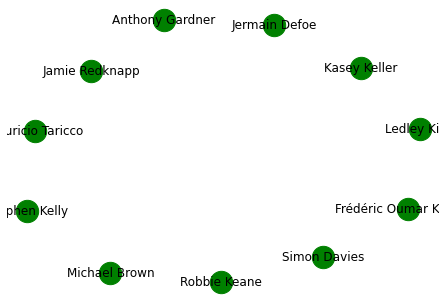

In [29]:
# Creating a graph called D1 which stores passing network for home team
D1 = nx.DiGraph()

# Looping through list of players and plotting a node with the player name, also storing the player's position
for x in player_names_home:
    D1.add_node(x[0], position = home_team_pos.get(x[0]))

# Displaying the graph D1
nx.draw(D1, node_size=500, node_color='green',with_labels=True)

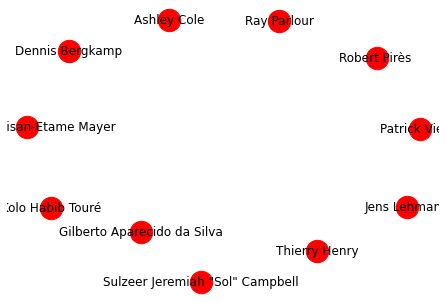

In [30]:
# Creating a graph called D2 which stores passing network for away team
D2 = nx.DiGraph()

# Looping through list of players and plotting a node with the player name, also storing the player's position
for y in player_names_away:
    D2.add_node(y[0], position = away_team_pos.get(y[0]))

# Displaying the graph D2
nx.draw(D2, node_size=500, node_color='red',with_labels=True)

In [31]:
# Looping through the elements in the element_count dictionary (which stores number of passes made from player A to player B)
for name, pass_count in element_count.items():
    # Splitting the key to get the separate names of the players
    name_a, name_b = name.split('->', 1)
    # Printing the names for testing purposes
    print("Pass From: "+str(name_a))
    print("Pass To: "+str(name_b))
    
    # Checking if each of the graphs has a node of the two players
    # If yes, then add an edge between those two nodes
    if D1.has_node(name_a) and D1.has_node(name_b):
        D1.add_edge(name_a, name_b, weight=pass_count)
    elif D2.has_node(name_a) and D2.has_node(name_b):
        D2.add_edge(name_a, name_b, weight=pass_count)
    
print("Nodes added!")

Pass From: Thierry Henry
Pass To: Dennis Bergkamp
Pass From: Dennis Bergkamp
Pass To: Patrick Vieira
Pass From: Patrick Vieira
Pass To: Ashley Cole
Pass From: Ashley Cole
Pass To: Sulzeer Jeremiah "Sol" Campbell
Pass From: Sulzeer Jeremiah "Sol" Campbell
Pass To: Gilberto Aparecido da Silva
Pass From: Gilberto Aparecido da Silva
Pass To: Kolo Habib Touré
Pass From: Kolo Habib Touré
Pass To: Laureano Bisan-Etame Mayer
Pass From: Laureano Bisan-Etame Mayer
Pass To: Ray Parlour
Pass From: Laureano Bisan-Etame Mayer
Pass To: Dennis Bergkamp
Pass From: Dennis Bergkamp
Pass To: Ray Parlour
Pass From: Kasey Keller
Pass To: Frédéric Oumar Kanouté
Pass From: Mauricio Taricco
Pass To: Jamie Redknapp
Pass From: Jamie Redknapp
Pass To: Mauricio Taricco
Pass From: Mauricio Taricco
Pass To: Ledley King
Pass From: Ashley Cole
Pass To: Robert Pirès 
Pass From: Robert Pirès 
Pass To: Gilberto Aparecido da Silva
Pass From: Gilberto Aparecido da Silva
Pass To: Robert Pirès 
Pass From: Robert Pirès 
Pass 

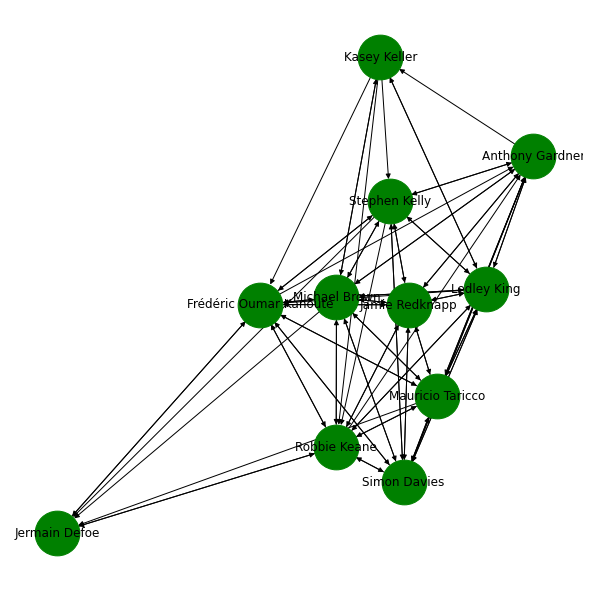

In [32]:
# Displaying the graph D1
# The plt package was used to increase the size of the graph
plt.figure(figsize=(8, 8))
nx.draw(D1, node_size=2000, node_color='green',with_labels=True)
plt.show()

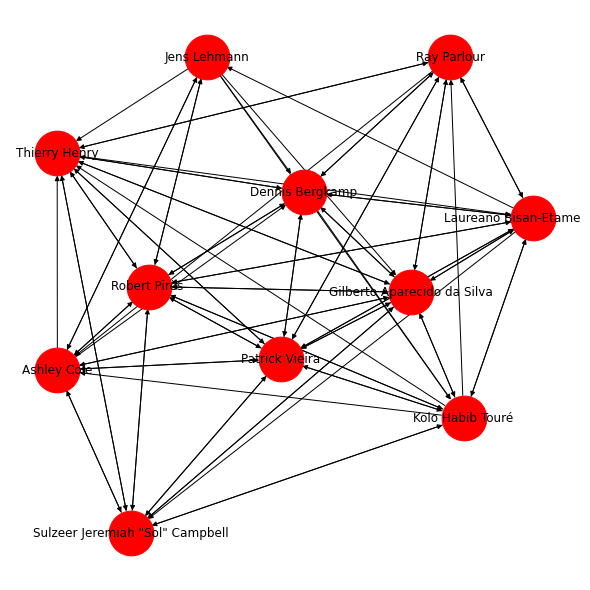

In [33]:
# Displaying the graph D2
# The plt package was used to increase the size of the graph
plt.figure(figsize=(8, 8))
nx.draw(D2, node_size=2000, node_color='red',with_labels=True)
plt.show()

### Part 1.3: Storing the passing network in Neo4j.

#### Using a cypher query to store the two graphs in the DBMS set at the beginning of the notebook. <br> Note: It is important that the DBMS is running in Neo4j in order for it to work, as otherwise errors will be generated from the Python side.

In [34]:
# Method which stores a graph into a Neo4j DBMS
def store_graph_in_neo4j(nx_graph, session, graph_label):
    # Converting and storing nodes, along with the position attribute
    for node_id, data in nx_graph.nodes(data=True):
        session.run("CREATE (n:Node {graph: $graph, id: $id, position: $position})", graph=graph_label, id=str(node_id), position=str(data['position']))  # Ensure node_id is cast to int

    # Converting and storing relationships
    for edge in nx_graph.edges(data=True):
        src, dst, weight = edge
        session.run("MATCH (a:Node {graph: $graph, id: $src}), (b:Node {graph: $graph, id: $dst}) CREATE (a)-[:PASS_TO {weight: $weight}]->(b)",
                    graph=graph_label, src=str(src), dst=str(dst), weight=float(weight['weight']))  # Ensure src, dst, and weight are cast to appropriate types

In [35]:
# Storing the first graph D1
with graphDriver.session() as session:
    store_graph_in_neo4j(D1, session, "graph1")
    #session.run("MATCH ()-[r:CONNECTED]->() DELETE r")

# Storing the second graph D2
with graphDriver.session() as session:
    store_graph_in_neo4j(D2, session, "graph2")
    #session.run("MATCH ()-[r:CONNECTED]->() DELETE r")

# Closing the Neo4j driver
graphDriver.close()

## Part 2: Analysing the structure of the passing network for each team using networkX.

### Part 2.1 - Getting total number of passes made from each team.

In [36]:
# Getting number of edges using the number_of_nodes submethod on the graph D1
D1.number_of_edges()

81

In [37]:
# Getting number of nodes using the number_of_nodes submethod on the graph D2
D2.number_of_edges()

82

In [38]:
# Getting the total weight of graph D1 (represents total number of passes)
int(D1.size(weight='weight'))

299

In [39]:
# Getting the total weight of graph D2 (represents total number of passes)
int(D2.size(weight='weight'))

331

### Part 2.2 - Calculating and plotting the degree distribution for each team.

In [40]:
# Calculating degree distribution for team A
degrees_A = [D1.degree(node) for node in D1.nodes()]

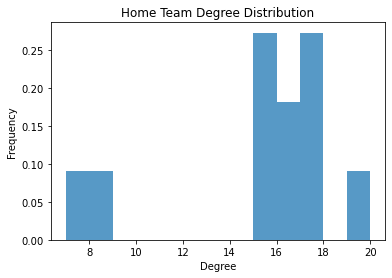

In [41]:
# Plotting the degree distribution of team A
plt.hist(degrees_A, bins=range(min(degrees_A), max(degrees_A) + 2), density=True, alpha=0.75)
plt.title("Home Team Degree Distribution")
plt.xlabel("Degree")
plt.ylabel("Frequency")
plt.show()

In [42]:
# Calculating degree distribution for team B
degrees_B = [D2.degree(node) for node in D2.nodes()]

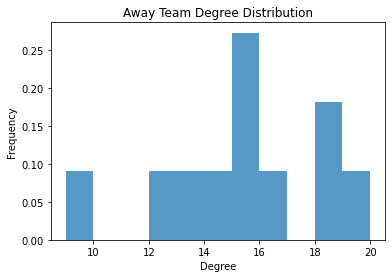

In [43]:
# Plotting the degree distribution of team B
plt.hist(degrees_B, bins=range(min(degrees_B), max(degrees_A) + 2), density=True, alpha=0.75)
plt.title("Away Team Degree Distribution")
plt.xlabel("Degree")
plt.ylabel("Frequency")
plt.show()

### Part 2.3 - Getting average path length from each graph.

In [44]:
# Getting the average path length for the home team graph D1
nx.average_shortest_path_length(D1)

1.2727272727272727

In [45]:
# Getting the average path length for the away team graph D2
nx.average_shortest_path_length(D2)

1.2545454545454546

### Part 2.4 - Calculating global clustering coefficient for each team.

In [46]:
# Calculate the global clustering coefficient for graph D1
global_clustering_coefficient_A = nx.average_clustering(D1)

# Print the result
print("Global Clustering Coefficient: "+str(global_clustering_coefficient_A))

Global Clustering Coefficient: 0.822139597308724


In [47]:
# Calculate the global clustering coefficient for graph D2
global_clustering_coefficient_B = nx.average_clustering(D2)

# Print the result
print("Global Clustering Coefficient: "+str(global_clustering_coefficient_B))

Global Clustering Coefficient: 0.784721594873826


## Part 3: Neo4j Queries (for each team)

### Part 3.1 - who is the most active player in terms of passes?

#### Home Team




MATCH (n1:Node {graph: 'graph1'}) <br>
OPTIONAL MATCH (n1)-[r1:PASS_TO]->(outgoingNode1) <br>
WITH n1, SUM(r1.weight) AS totalWeight1, COUNT(outgoingNode1) AS outgoingEdgeCount1 <br>
ORDER BY totalWeight1 DESC <br>
RETURN n1 AS nodeWithMostOutgoingWeight1, totalWeight1, outgoingEdgeCount1 <br>
LIMIT 1;

#### Away Team




MATCH (n2:Node {graph: 'graph2'}) <br>
OPTIONAL MATCH (n2)-[r2:PASS_TO]->(outgoingNode2) <br>
WITH n2, SUM(r2.weight) AS totalWeight2, COUNT(outgoingNode2) AS outgoingEdgeCount2 <br>
ORDER BY totalWeight2 DESC <br>
RETURN n2 AS nodeWithMostOutgoingWeight2, totalWeight2, outgoingEdgeCount2 <br>
LIMIT 1;

### Part 3.2 - which players have an intermediary role (list the top 3 per team)?

#### Home Team




MATCH (n1:Node {graph: 'graph1'}) <br>
WHERE n1.position CONTAINS "Midfield" or n1.position CONTAINS "Right Back" or n1.position CONTAINS "Left Back" <br>
RETURN n1.id AS PlayerName, n1.position AS Role <br>
LIMIT 3;

#### Away Team




MATCH (n2:Node {graph: 'graph2'}) <br>
WHERE n2.position CONTAINS "Midfield" or n2.position CONTAINS "Right Back" or n2.position CONTAINS "Left Back" <br>
RETURN n2.id AS PlayerName, n2.position AS Role <br>
LIMIT 3;

### Part 3.3 - how central is a player?

#### Home Team




MATCH (n1:Node {graph: 'graph1'}) <br>
WHERE n1.position CONTAINS "Center Midfield" or n1.position CONTAINS "Center Back" or n1.position CONTAINS "Center Forward" <br>
RETURN n1.id AS PlayerName, n1.position AS Position <br>
ORDER BY n1.position, n1.id;

#### Away Team




MATCH (n2:Node {graph: 'graph2'}) <br>
WHERE n2.position CONTAINS "Center Midfield" or n2.position CONTAINS "Center Back" or n2.position CONTAINS "Center Forward" <br>
RETURN n2.id AS PlayerName, n2.position AS Position <br>
ORDER BY n2.position, n2.id;

### Part 3.4 - who is the player that received the highest number of passes?

#### Home Team




MATCH (n1:Node {graph: 'graph1'}) <br>
OPTIONAL MATCH (n1)<-[r1:PASS_TO]-(incomingNode1) <br>
WITH n1, SUM(r1.weight) AS totalWeight1, COUNT(incomingNode1) AS incomingEdgeCount1 <br>
ORDER BY totalWeight1 DESC <br>
RETURN n1 AS nodeWithMostWeight1, totalWeight1, incomingEdgeCount1 <br>
LIMIT 1;

#### Away Team




MATCH (n2:Node {graph: 'graph2'}) <br>
OPTIONAL MATCH (n2)<-[r2:PASS_TO]-(incomingNode2) <br>
WITH n2, SUM(r2.weight) AS totalWeight2, COUNT(incomingNode2) AS incomingEdgeCount2 <br>
ORDER BY totalWeight2 DESC <br>
RETURN n2 AS nodeWithMostWeight2, totalWeight2, incomingEdgeCount2 <br>
LIMIT 1;